In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import naive_bayes
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
np.random.seed(0)

Trainingsdaten:

In [2]:
X_train_extracted_min = pd.read_csv('../data/Features/wood_plastic/features_zum_tranieren/tsfresh_extracted_mini.csv', sep=',')
y_train_extracted_min = pd.read_csv('../data/Features/wood_plastic/features_zum_tranieren/wood_plastic_measurements_train.csv', sep=',')['material']
X_train_extracted_com = pd.read_csv('../data/Features/wood_plastic/features_zum_tranieren/tsfresh_extracted_compreh.csv', sep=',')
y_train_extracted_com = y_train_extracted_min

Testdaten:

In [3]:
X_test_extracted_min = pd.read_csv('../data/Features/wood_plastic/features_zum_testen/tsfresh_extracted_mini.csv', sep=',')
y_test_extracted_min = pd.read_csv('../data/Features/wood_plastic/features_zum_testen/wood_plastic_measurements_test.csv', sep=',')['material']
X_test_extracted_com =  pd.read_csv('../data/Features/wood_plastic/features_zum_testen/tsfresh_extracted_compreh.csv', sep=',')
y_test_extracted_com = y_test_extracted_min


In [4]:
# X_train_extracted_com_forward = pd.read_csv('../data/Features/FeatureAnalysisSelections/wood_plastic/Train/10X_train_com_forward.csv ', sep=',')
# X_train_extracted_com_backward = pd.read_csv('../data/Features/FeatureAnalysisSelections/wood_plastic/Train/10X_train_com_backward.csv', sep=',')
# X_train_extracted_com_tsfresh = pd.read_csv('../data/Features/wood_plastic/features_zum_tranieren/tsfresh_com_10Features.csv', sep=',')

In [5]:
# X_train_extracted_com_forward.drop(columns= "Unnamed: 0", inplace=True)
# X_train_extracted_com_backward.drop(columns= "Unnamed: 0", inplace=True)

Anzahl Features:
(Wenn ungerenzt/egal, dann None, sonst die gewünschte Anzahl als Zahl)

In [6]:
nfeatures =  10# "auto" # "auto" oder bsp.: 2, 90, 280, etc.

Zielordner: (Welche Materialien wurden gebohrt? Nur Plastik und Holz oder auch Metall etc.?)

In [7]:
targetDir = '../data/Features/FeatureAnalysisSelections/wood_plastic/'

Entferne Unaussagekräftige Features:

In [8]:
X_train_extracted_min_ISUNIQUE = X_train_extracted_min
X_train_extracted_com_ISUNIQUE = X_train_extracted_com
X_train_extracted_min = X_train_extracted_min.loc[:, X_train_extracted_min_ISUNIQUE.nunique() > 1]
X_train_extracted_com = X_train_extracted_com.loc[:, X_train_extracted_com_ISUNIQUE.nunique() > 1]
X_test_extracted_min = X_test_extracted_min.loc[:, X_train_extracted_min_ISUNIQUE.nunique() > 1]
X_test_extracted_com = X_test_extracted_com.loc[:, X_train_extracted_com_ISUNIQUE.nunique() > 1]

Zielvariablen Typ Anpassen:

In [9]:
"""
OPTIONALER CODE:
Dadurch, dass wir die X_train und X_test Selektierte Daten speichern werden, brauchen wir eventuell in der Zukunft auch die Zielvariable
"""

# y_train_extracted_min.to_csv(targetDir+"Train/"+"y_train_min.csv")
# y_train_extracted_com.to_csv(targetDir+"Train/"+"y_train_com.csv")
# y_test_extracted_min.to_csv(targetDir+"Test/"+"y_test_min.csv")
# y_test_extracted_com.to_csv(targetDir+"Test/"+"y_test_com.csv")

'\nOPTIONALER CODE:\nDadurch, dass wir die X_train und X_test Selektierte Daten speichern werden, brauchen wir eventuell in der Zukunft auch die Zielvariable\n'

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Dieser Schritt ist wichtig nur für den KNN-Klassifier.

y_train_extracted_min = label_encoder.fit_transform(y_train_extracted_min)
y_train_extracted_com = label_encoder.fit_transform(y_train_extracted_com)
y_test_extracted_min = label_encoder.fit_transform(y_test_extracted_min)
y_test_extracted_com = label_encoder.fit_transform(y_test_extracted_com)

Nun kommt die Selektierung der Features in den Daten

Forward Selection:

In [11]:
from sklearn.feature_selection import SequentialFeatureSelector

In [12]:
forwardSelection_min = SequentialFeatureSelector(DecisionTreeClassifier(random_state= 7), n_features_to_select=nfeatures ,  direction='forward', n_jobs=-1)

In [13]:
forwardSelection_min.fit(X_train_extracted_min, y_train_extracted_min)
X_train_extracted_min_forward = forwardSelection_min.transform(X_train_extracted_min)
X_test_extracted_min_forward = forwardSelection_min.transform(X_test_extracted_min) 

In [14]:
X_train_extracted_min[X_train_extracted_min.columns[forwardSelection_min.get_support()]].to_csv(targetDir+"Train/" + str(nfeatures) + "X_train_min_forward.csv")
X_test_extracted_min[X_test_extracted_min.columns[forwardSelection_min.get_support()]].to_csv(targetDir+"Test/"+ str(nfeatures)+"X_test_min_forward.csv")

In [15]:
forwardSelection_com = SequentialFeatureSelector(DecisionTreeClassifier(random_state=7), n_features_to_select=nfeatures ,  direction='forward', n_jobs=-1)

In [16]:
forwardSelection_com.fit(X_train_extracted_com, y_train_extracted_com)
X_train_extracted_com_forward = forwardSelection_com.transform(X_train_extracted_com)
X_test_extracted_com_forward = forwardSelection_com.transform(X_test_extracted_com) 

In [17]:
X_train_extracted_com[X_train_extracted_com.columns[forwardSelection_com.get_support()]].to_csv(targetDir+"Train/"+ str(nfeatures)+"X_train_com_forward.csv")
X_test_extracted_com[X_test_extracted_com.columns[forwardSelection_com.get_support()]].to_csv(targetDir+"Test/"+ str(nfeatures)+"X_test_com_forward.csv")

Backward Selection:

In [18]:
backwardSelection_min = SequentialFeatureSelector(DecisionTreeClassifier(random_state= 7), n_features_to_select=nfeatures ,  direction='backward', n_jobs=-1)

In [19]:
backwardSelection_min.fit(X_train_extracted_min, y_train_extracted_min)
X_train_extracted_min_backward = backwardSelection_min.transform(X_train_extracted_min)
X_test_extracted_min_backward = backwardSelection_min.transform(X_test_extracted_min) 

In [20]:
X_train_extracted_min[X_train_extracted_min.columns[backwardSelection_min.get_support()]].to_csv(targetDir+"Train/"+ str(nfeatures)+"X_train_min_backward.csv")
X_test_extracted_min[X_test_extracted_min.columns[backwardSelection_min.get_support()]].to_csv(targetDir+"Test/"+ str(nfeatures)+"X_test_min_backward.csv")

In [21]:
backwardSelection_com = SequentialFeatureSelector(DecisionTreeClassifier(random_state= 7), n_features_to_select=nfeatures ,  direction='backward', n_jobs=-1)

In [22]:
backwardSelection_com.fit(X_train_extracted_com, y_train_extracted_com)
X_train_extracted_com_backward = backwardSelection_com.transform(X_train_extracted_com)
X_test_extracted_com_backward = backwardSelection_com.transform(X_test_extracted_com) 

In [23]:
X_train_extracted_com[X_train_extracted_com.columns[backwardSelection_com.get_support()]].to_csv(targetDir+"Train/"+ str(nfeatures)+"X_train_com_backward.csv")
X_test_extracted_com[X_test_extracted_com.columns[backwardSelection_com.get_support()]].to_csv(targetDir+"Test/"+ str(nfeatures)+"X_test_com_backward.csv")

TsFresh:

In [24]:
X_train_extracted_min_tsfresh = pd.read_csv('../data/Features/wood_plastic/features_zum_tranieren/tsfresh_mini_10Features.csv', sep=',')
X_test_extracted_min_tsfresh = pd.read_csv('../data/Features/wood_plastic/features_zum_testen/tsfresh_mini_10Features.csv', sep=',')

In [25]:
X_train_extracted_com_tsfresh = pd.read_csv('../data/Features/wood_plastic/features_zum_tranieren/tsfresh_com_10Features.csv', sep=',')
X_test_extracted_com_tsfresh = pd.read_csv('../data/Features/wood_plastic/features_zum_testen/tsfresh_com_10Features.csv', sep=',')

Grid Search:

In [26]:
from sklearn.discriminant_analysis import StandardScaler

pipelines = []

pipelines += [(Pipeline([
  #  ('scaler', StandardScaler()),  
    ('classifier', DecisionTreeClassifier())  
]), "decision tree")]

pipelines += [(Pipeline([
 #   ('scaler', StandardScaler()),  
    ('classifier', RandomForestClassifier())  
]),"random forest")]

pipelines += [(Pipeline([
    ('scaler', StandardScaler()),  
    ('classifier', KNeighborsClassifier()) 
]),"knn")]

In [27]:
# Decision Tree Classifier
dt_params = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# Random Forest Classifier
rf_params = {
    'classifier__n_estimators': [10, 20, 30, 40, 50, 100, 200],
    'classifier__max_depth': [10, 20, 30, 40],
    'classifier__min_samples_split': [2, 3, 5, 7, 10]
}

# KNN
knn_params = {
    'classifier__n_neighbors': [3, 4, 5],
    'classifier__weights': ['distance', 'uniform'] ,
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'classifier__leaf_size': [5, 10, 15, 20],
    'classifier__p': [1, 2],
    'classifier__metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']  
}

In [28]:
grid_search_params = {}

grid_search_params['random forest'] = rf_params
grid_search_params['decision tree'] = dt_params
grid_search_params['knn'] = knn_params

In [29]:
def grid_search_run(X_train, y_train, X_test = None, y_test = None)->dict:
    results = {}

    for pipeline, name in pipelines:
        np.random.seed(0)

        grid_search = GridSearchCV(pipeline, grid_search_params[name], cv=5)
        grid_search.fit(X_train, y_train)

        cv_results = grid_search.cv_results_
        mean_cv_accuracy = np.mean(cv_results['mean_test_score'])
        if X_test is not None and y_test is not None:
            results[name] = {
                'grid_search': grid_search,
                'best_model': grid_search.best_estimator_,
                'best_params': grid_search.best_params_,
                'accuracy_train_cv': mean_cv_accuracy,
                'accuracy_test': grid_search.score(X_test, y_test)
            }
        else:
            results[name] = {
                'grid_search': grid_search,
                'best_model': grid_search.best_estimator_,
                'best_params': grid_search.best_params_,
                'accuracy_train_cv': mean_cv_accuracy,
            }

    return results

Nun wird die Grid Search auf alle Datensätze angewandt:

forward:

In [30]:
results_min_forward = grid_search_run(X_train_extracted_min_forward, y_train_extracted_min, X_test_extracted_min_forward, y_test_extracted_min)

In [31]:
results_com_forward = grid_search_run(X_train_extracted_com_forward, y_train_extracted_com, X_test_extracted_com_forward, y_test_extracted_com)

backward:

In [32]:
results_min_backward = grid_search_run(X_train_extracted_min_backward, y_train_extracted_min, X_test_extracted_min_backward, y_test_extracted_min)

In [33]:
results_com_backward = grid_search_run(X_train_extracted_com_backward, y_train_extracted_com, X_test_extracted_com_backward, y_test_extracted_com)

tsfresh:

In [34]:
results_min_tsfresh = grid_search_run(X_train_extracted_min_tsfresh, y_train_extracted_min, X_test_extracted_min_tsfresh, y_test_extracted_min)

In [35]:
results_com_tsfresh = grid_search_run(X_train_extracted_com_tsfresh, y_train_extracted_com, X_test_extracted_com_tsfresh, y_test_extracted_com)

Als nächstes plotten wir das Ergebnis aller Feature Selektionen

Zuerst Rangfolge der Klassifikationen Sortieren nach Genauigkeit:

In [36]:
results_min_forward = sorted(results_min_forward.items(), key=lambda x: (x[0]), reverse=True)
results_com_forward = sorted(results_com_forward.items(), key=lambda x: (x[0]), reverse=True)

In [37]:
results_min_backward = sorted(results_min_backward.items(), key=lambda x: (x[0]), reverse=True)
results_com_backward = sorted(results_com_backward.items(), key=lambda x: (x[0]), reverse=True)

In [38]:
results_min_tsfresh = sorted(results_min_tsfresh.items(), key=lambda x: (x[0]), reverse=True)
results_com_tsfresh = sorted(results_com_tsfresh.items(), key=lambda x: (x[0]), reverse=True)

Erstellung der Visualisierung und Übersicht:

In [39]:
import numpy as np
import matplotlib.pyplot as plt

def plot_run(titel, com_sorted_results, min_sorted_results, save_path=None) -> None:
    names = []
    test_scores = []
    validation_scores = []

    for rank, (name, result) in enumerate(com_sorted_results, start=1):
        names.append(f"{rank}: {name}")
        test_scores.append(result.get('accuracy_train_cv', 0.0))
        
        # if 'accuracy_test' in result and result['accuracy_test'] is not None:
        #     validation_scores.append(result['accuracy_test'])
        # else:
        #     validation_scores.append(0.0)

    bar_width = 0.3
    r1 = np.arange(len(names))
    r2 = [x + bar_width for x in r1]
    # r3 = [x + bar_width for x in r2]

    fig, axs = plt.subplots(1, 2, figsize=(18, 6))

    bar1 = axs[0].bar(r1, test_scores, color='steelblue', width=bar_width, label='Trainingsdaten (CV)')
    # axs[0].bar(r2, validation_scores, color='palevioletred', width=bar_width, label='Testdaten')

    axs[0].set_xlabel('Modelle')
    axs[0].set_ylabel('Genauigkeit %')
    axs[0].set_title('Features mittels ComprehensiveFCParameters')
    axs[0].set_xticks([r + bar_width / 2 for r in range(len(names))])
    axs[0].set_xticklabels(names, ha='right')#, rotation=30, ha='right')
    axs[0].legend()

    # Set y-axis limits to range from 0 to 1 with 0.2 steps
    axs[0].set_ylim(0, 1)
    axs[0].set_yticks(np.arange(0, 1.1, 0.1))

    names2 = []
    test_scores2 = []
    validation_scores2 = []

    for rank, (name, result) in enumerate(min_sorted_results, start=1):
        names2.append(f"{rank}: {name}")
        test_scores2.append(result.get('accuracy_train_cv', 0.0))
        
        # if 'accuracy_test' in result and result['accuracy_test'] is not None:
        #     validation_scores2.append(result['accuracy_test'])
        # else:
        #     validation_scores2.append(0.0)

    bar2 = axs[1].bar(r1, test_scores2, color='steelblue', width=bar_width, label='Trainingsdaten (CV)')
    # axs[1].bar(r2, validation_scores2, color='palevioletred', width=bar_width, label='Testdaten')

    axs[1].set_xlabel('Modelle')
    axs[1].set_ylabel('Genauigkeit %')
    axs[1].set_title('Features mittels MinimalFCParameters')
    axs[1].set_xticks([r + bar_width / 2 for r in range(len(names2))])
    axs[1].set_xticklabels(names2, ha='right')#, rotation=30, ha='right')
    axs[1].legend()

    # Set y-axis limits to range from 0 to 1 with 0.2 steps
    axs[1].set_ylim(0, 1)
    axs[1].set_yticks(np.arange(0, 1.1, 0.1))  
    
    for bar, score in zip(bar1, test_scores):
        axs[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2%}', 
                    ha='center', va='bottom', fontsize=10, color='black')
    for bar, score in zip(bar2, test_scores2):
        axs[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2%}', 
                    ha='center', va='bottom', fontsize=10, color='black')
    
    
    axs[0].grid(True, linestyle='--', alpha=0.6)
    axs[1].grid(True, linestyle='--', alpha=0.6)
    if save_path:
        plt.savefig(save_path, bbox_inches="tight")
        
    plt.suptitle(titel, y=1.05, fontsize=16, ha='center')
    plt.tight_layout()
    plt.show()

    # print("Rangliste für com:")
    # for rank, (name, result) in enumerate(com_sorted_results, start=1):
    #     print(f"Rang {rank}: {name}")
    #     print(f"Beste Parameter: {result.get('best_params', 'Nicht verfügbar')}")
    #     print(f"Beste Genauigkeit Trainingsdaten (CV): {result.get('accuracy_train_cv', 'Nicht verfügbar')}")
        
    #     if 'accuracy_test' in result and result['accuracy_test'] is not None:
    #         print(f"Beste Genauigkeit accuracy_test: {result['accuracy_test']}")
    #     else:
    #         print("Genauigkeit accuracy_test: Nicht verfügbar\n")

    # print("\nRangliste für min:")
    # for rank, (name, result) in enumerate(min_sorted_results, start=1):
    #     print(f"Rang {rank}: {name}")
    #     print(f"Beste Parameter: {result.get('best_params', 'Nicht verfügbar')}")
    #     print(f"Beste Genauigkeit Trainingsdaten (CV): {result.get('accuracy_train_cv', 'Nicht verfügbar')}")
        
    #     if 'accuracy_test' in result and result['accuracy_test'] is not None:
    #         print(f"Beste Genauigkeit accuracy_test: {result['accuracy_test']}")
    #     else:
    #         print("Genauigkeit accuracy_test: Nicht verfügbar\n")


Ausgabe der Visualisierung und Übersicht:

forward:

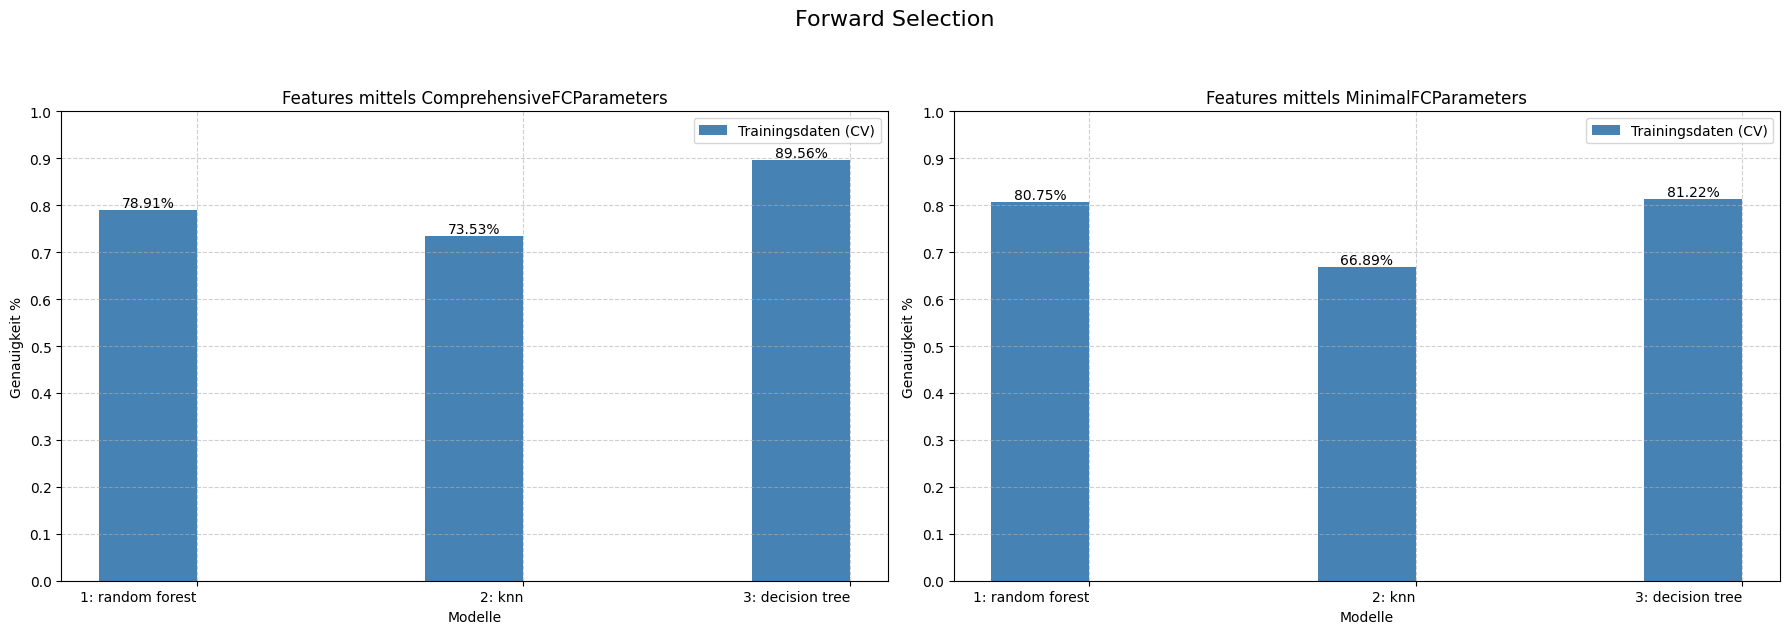

In [40]:
plot_run("Forward Selection", results_com_forward, results_min_forward, targetDir + "Train/" + str(nfeatures) + "_forward.png")

backward:

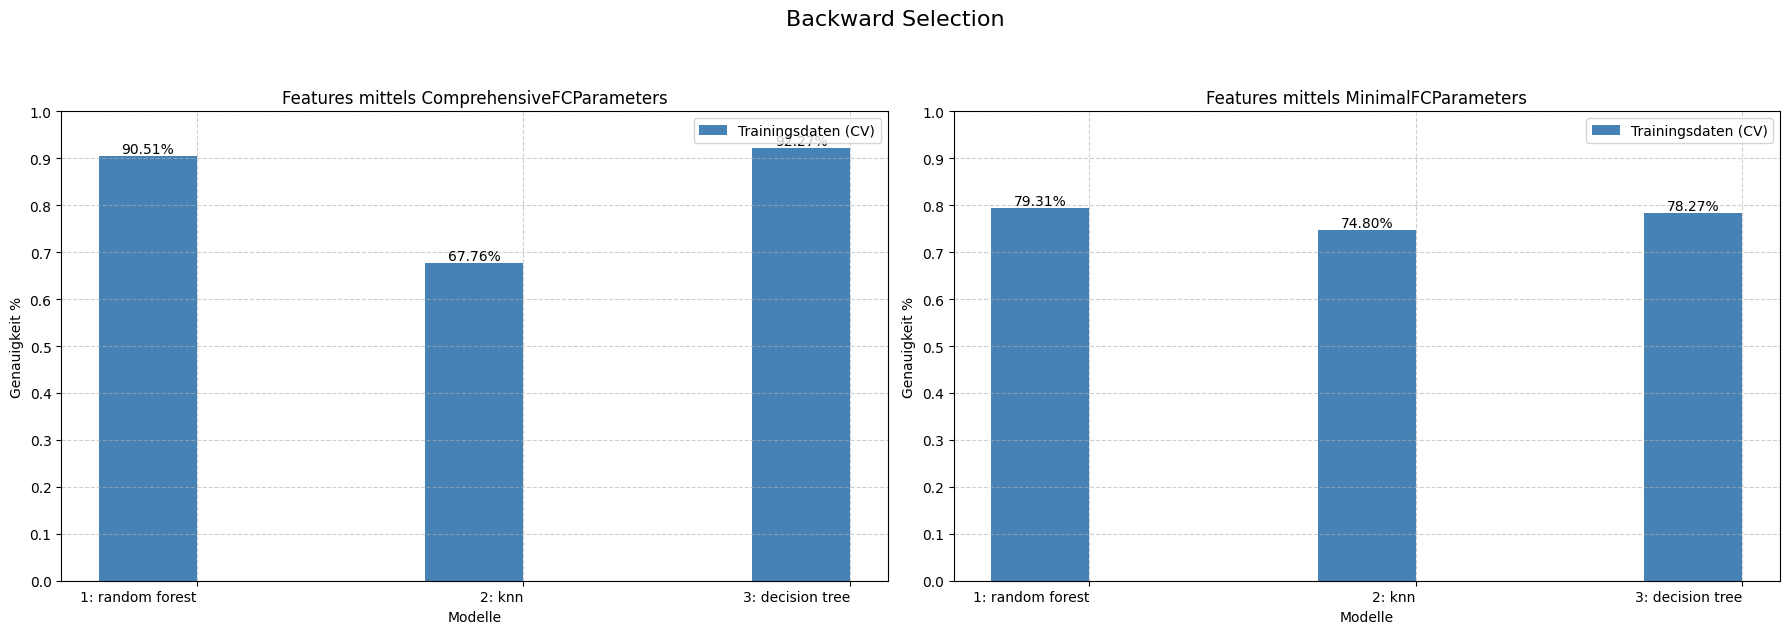

In [41]:
plot_run("Backward Selection", results_com_backward, results_min_backward, targetDir + "Train/" + str(nfeatures) + "_backward.png")

tsfresh:

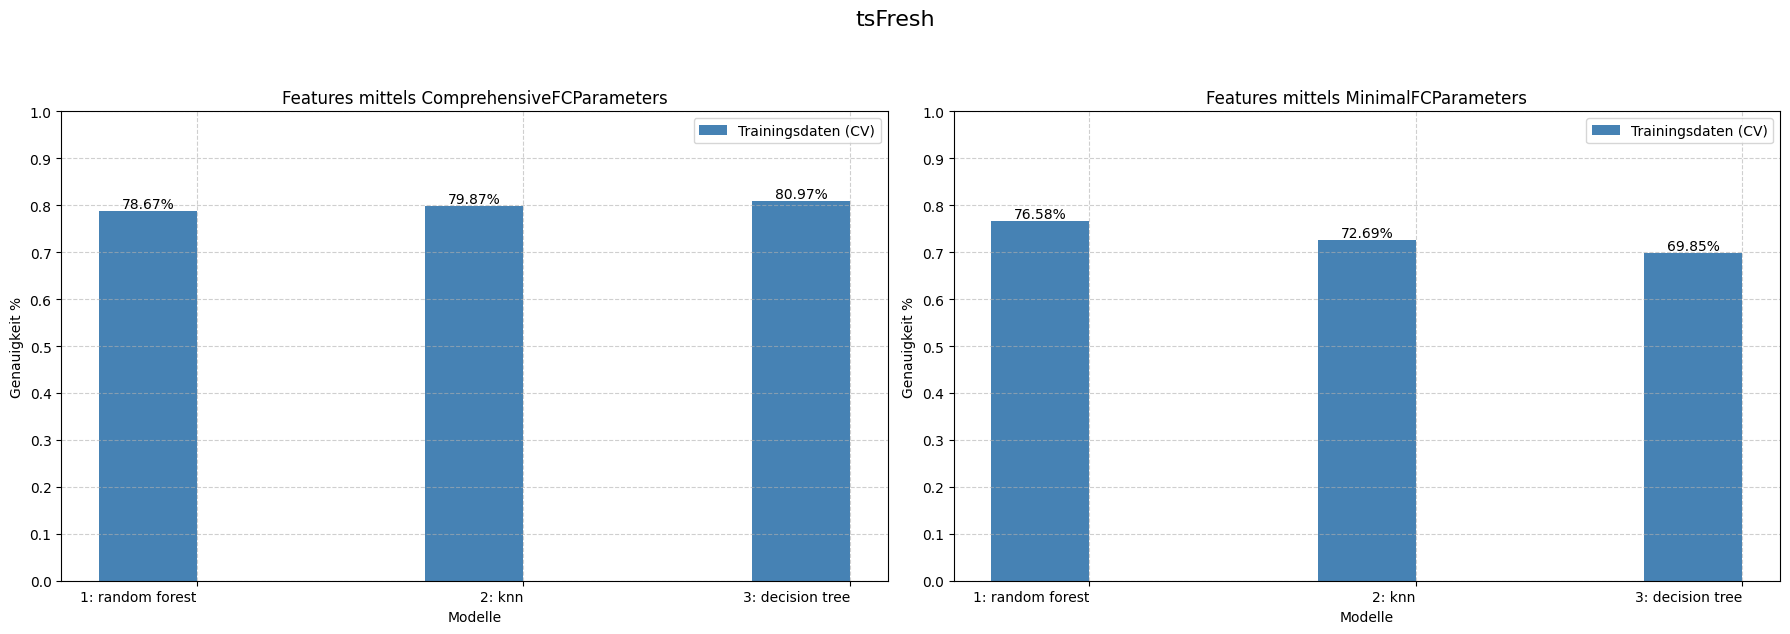

In [42]:
plot_run("tsFresh", results_com_tsfresh, results_min_tsfresh, targetDir + "Train/" + str(nfeatures) + "_tsfresh.png")

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def summary_plot_run(titel, com_forward, min_forward, com_backward, min_backward, com_tsfresh, min_tsfresh, save_path=None) -> None:
    fontsize_balken = 10
    names = []
    test_scores1 = []
    test_scores2 = []
    test_scores3 = []
    for rank, (result1, result2, result3) in enumerate(zip(com_forward, com_backward, com_tsfresh), start=1):
        name = f"{rank}: {result1[0]}" 
        names.append(name)
        
        test_scores1.append(result1[1].get('accuracy_train_cv', 0.0))
        test_scores2.append(result2[1].get('accuracy_train_cv', 0.0))
        test_scores3.append(result3[1].get('accuracy_train_cv', 0.0))

    bar_width = 0.3
    r1 = np.arange(len(names))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]

    fig, axs = plt.subplots(1, 2, figsize=(18, 6))

    bars1 = axs[0].bar(r1, test_scores1, color='mediumseagreen', width=bar_width, label='Forward Selection')
    bars2 = axs[0].bar(r2, test_scores2, color='steelblue', width=bar_width, label='Backward Selection')
    bars3 = axs[0].bar(r3, test_scores3, color='palevioletred', width=bar_width, label='Tsfresh')

    axs[0].set_xlabel('ML-Modelle')
    axs[0].set_ylabel('Genauigkeit %')
    axs[0].set_title('ComprehensiveFCParameters')
    axs[0].set_xticks([r + bar_width / 2 for r in range(len(names))])
    axs[0].set_xticklabels(names, ha='left')
    
    axs[0].set_ylim(0, 1)
    axs[0].set_yticks(np.arange(0, 1.2, 0.1))

    # Texte in die Balken schreiben
    for bar, score in zip(bars1, test_scores1):
        axs[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2%}', 
                    ha='center', va='bottom', fontsize=fontsize_balken, color='black')
    
    for bar, score in zip(bars2, test_scores2):
        axs[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2%}', 
                    ha='center', va='bottom', fontsize=fontsize_balken, color='black')
    
    for bar, score in zip(bars3, test_scores3):
        axs[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2%}', 
                    ha='center', va='bottom', fontsize=fontsize_balken, color='black')

    names2 = []
    test_1scores = []
    test_2scores = []
    test_3scores = []
    for rank, (result1, result2, result3) in enumerate(zip(min_forward, min_backward, min_tsfresh), start=1):
        name = f"{rank}: {result1[0]}"  
        names2.append(name)
        
        test_1scores.append(result1[1].get('accuracy_train_cv', 0.0))
        test_2scores.append(result2[1].get('accuracy_train_cv', 0.0))
        test_3scores.append(result3[1].get('accuracy_train_cv', 0.0))

        
    bars1 = axs[1].bar(r1, test_1scores, color='mediumseagreen', width=bar_width, label='Forward Selection')
    bars2 = axs[1].bar(r2, test_2scores, color='steelblue', width=bar_width, label='Backward Selection')
    bars3 = axs[1].bar(r3, test_3scores, color='palevioletred', width=bar_width, label='Tsfresh')

    axs[1].set_xlabel('ML-Modelle')
    # axs[1].set_ylabel('Genauigkeit %')
    axs[1].set_title('MinimalFCParameters')
    axs[1].set_xticks([r + bar_width / 2 for r in range(len(names2))])
    axs[1].set_xticklabels(names2, ha='left')
    # axs[1].legend()

    # axs[1].set_ylim(0, 1)
    axs[1].set_yticks(np.arange(0, 1.1, 0.1))

    # axs[1].get_yaxis().set_visible(False)
    axs[1].legend(bbox_to_anchor=(1, 1), loc='upper left',title='Trainingsdaten (CV)')

    for bar, score in zip(bars1, test_1scores):
        axs[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2%}', 
                    ha='center', va='bottom', fontsize=fontsize_balken, color='black')
    
    for bar, score in zip(bars2, test_2scores):
        axs[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2%}', 
                    ha='center', va='bottom', fontsize=fontsize_balken, color='black')
    
    for bar, score in zip(bars3, test_3scores):
        axs[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2%}', 
                    ha='center', va='bottom', fontsize=fontsize_balken, color='black')

    axs[0].grid(True, linestyle='--', alpha=0.6)
    axs[1].grid(True, linestyle='--', alpha=0.6)
    
    if save_path:
        plt.savefig(save_path, bbox_inches="tight")
        
    plt.suptitle(titel, y=1.05, fontsize=16, ha='center')
    plt.tight_layout()
    plt.show()

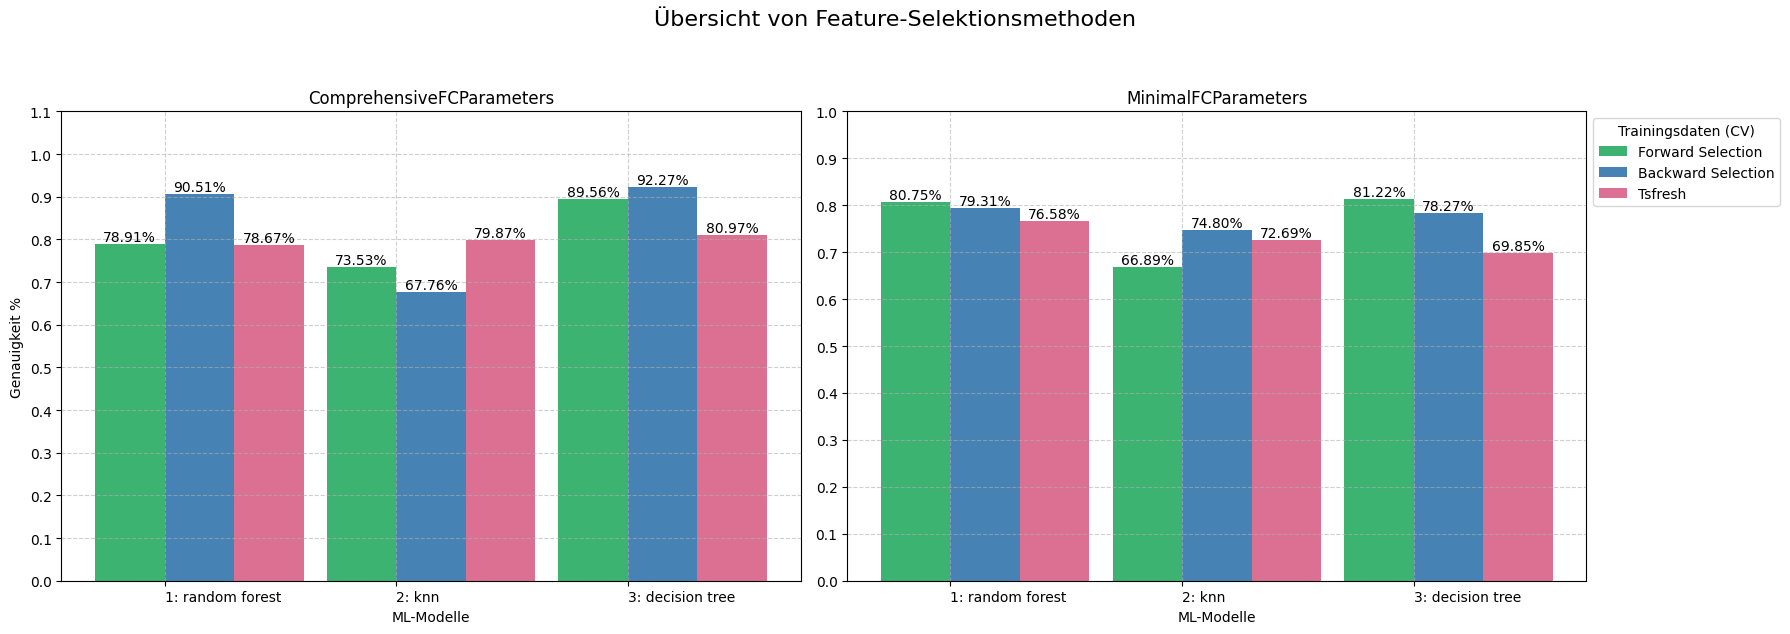

In [44]:
summary_plot_run("Übersicht von Feature-Selektionsmethoden", results_com_forward, results_min_forward, results_com_backward, results_min_backward, results_com_tsfresh, results_min_tsfresh, targetDir + "Train/" + str(nfeatures) + "_global_view.png")